<a href="https://colab.research.google.com/github/RonitGandhi/PSL-RA/blob/main/Craven_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Models


**Feedforward Neural Network**

The feedforward neural network will take the current inputs and predict the current outputs.

**Autoregressive Neural Network**

The autoregressive neural network will use the current inputs and the previous time step's predicted outputs to predict the current outputs.

#FF AND AR MODELS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = '/content/craven_data_csv.csv'
data = pd.read_csv(file_path)

# Separate inputs (first 5 columns) and outputs (next 5 columns)
inputs = data.iloc[:, :5].values
outputs = data.iloc[:, 5:].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, shuffle=False)

# Normalize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Define and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

# Make predictions
ff_predictions_scaled = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test_scaled, ff_predictions_scaled)
print(f'Mean Squared Error: {mse}')

# Inverse transform the predictions and actual values
ff_predictions = scaler_y.inverse_transform(ff_predictions_scaled)
y_test = scaler_y.inverse_transform(y_test_scaled)

# Save actual vs predicted values to CSV
results = pd.DataFrame({
    'Actual_1': y_test[:, 0],
    'Predicted_FF_1': ff_predictions[:, 0],
    'Actual_2': y_test[:, 1],
    'Predicted_FF_2': ff_predictions[:, 1],
    'Actual_3': y_test[:, 2],
    'Predicted_FF_3': ff_predictions[:, 2],
    'Actual_4': y_test[:, 3],
    'Predicted_FF_4': ff_predictions[:, 3],
    'Actual_5': y_test[:, 4],
    'Predicted_FF_5': ff_predictions[:, 4]
})

results.to_csv('/mnt/data/actual_vs_predicted.csv', index=False)

# Plotting
plt.figure(figsize=(12, 8))

for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.plot(y_test[:, i], label='Actual')
    plt.plot(ff_predictions[:, i], label='Predicted')
    plt.title(f'Output {i+1}')
    plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/100
151/151 [==============================] - 1s 2ms/step - loss: 0.0693
Epoch 2/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 3/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 4/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 5/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 6/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 7/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 8/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 9/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 10/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 11/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 12/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 13/100


Understanding the MATLAB Code and Reference Links
1. Feedforward Neural Network (nn_FF_time.m):
The MATLAB script likely defines a feedforward neural network (FFNN) for time series prediction.
Key points:
Input data consists of the current time step features.
Output data consists of the current time step target values.
The network might include layers like feedforwardnet or similar, with specified training functions.
2. Autoregressive Neural Network (nn_AR_time.m):
The MATLAB script likely defines an autoregressive network (NARX) where the output at the previous time step is used as an input feature.
Key points:
Input data consists of the current time step features and the previous time step target values.
Output data consists of the current time step target values.
The network might include layers like narxnet or similar, with feedback loops for autoregression.

# Gated Recurrent Unit (GRU) Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

from sklearn.metrics import mean_squared_error
import numpy as np
# 1. Data Preprocessing
data = pd.read_csv('craven_data_csv.csv')
input_cols = ['Time', 'pH', 'T', 'DO', 'F'] + ['G', 'Q', 'L', 'A', 'P']
output_cols = ['G', 'Q', 'L', 'A', 'P']

scaler = MinMaxScaler()
data[input_cols] = scaler.fit_transform(data[input_cols])

X = data[input_cols].values
y = data[output_cols].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data to have a time step dimension
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# 2. Model Architecture
model = Sequential()
model.add(GRU(64, activation='relu', input_shape=(1, len(input_cols))))
model.add(Dense(5))

# 3. Model Training
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, batch_size=32)

# 4. Model Testing
test_predictions = []
test_input = X_test[0].reshape(1, 1, -1)

for i in range(len(X_test)):
    if i > 0:
        # Use the actual output from the previous time step as input
        test_input[:, :, len(input_cols)-len(output_cols):] = y_test[i-1]

    pred = model.predict(test_input)
    test_predictions.append(pred)

test_predictions = np.array(test_predictions).squeeze()

predictions_df = pd.DataFrame(test_predictions, columns=output_cols)
predictions_df.to_csv('predictions.csv', index=False)

# 6. Model Evaluation
mse = mean_squared_error(y_test, test_predictions)
print(f'Mean Squared Error: {mse}')

#GRU model with improvements

Epoch 1/200
136/136 [==============================] - 12s 10ms/step - loss: 0.2750 - val_loss: 0.2141 - lr: 0.0010
Epoch 2/200
136/136 [==============================] - 1s 6ms/step - loss: 0.0836 - val_loss: 0.0782 - lr: 0.0010
Epoch 3/200
136/136 [==============================] - 1s 7ms/step - loss: 0.0568 - val_loss: 0.0315 - lr: 0.0010
Epoch 4/200
136/136 [==============================] - 1s 7ms/step - loss: 0.0428 - val_loss: 0.0145 - lr: 0.0010
Epoch 5/200
136/136 [==============================] - 1s 7ms/step - loss: 0.0356 - val_loss: 0.0118 - lr: 0.0010
Epoch 6/200
136/136 [==============================] - 1s 7ms/step - loss: 0.0308 - val_loss: 0.0102 - lr: 0.0010
Epoch 7/200
136/136 [==============================] - 1s 7ms/step - loss: 0.0285 - val_loss: 0.0096 - lr: 0.0010
Epoch 8/200
136/136 [==============================] - 1s 8ms/step - loss: 0.0259 - val_loss: 0.0091 - lr: 0.0010
Epoch 9/200
136/136 [==============================] - 1s 9ms/step - loss: 0.0242 - va

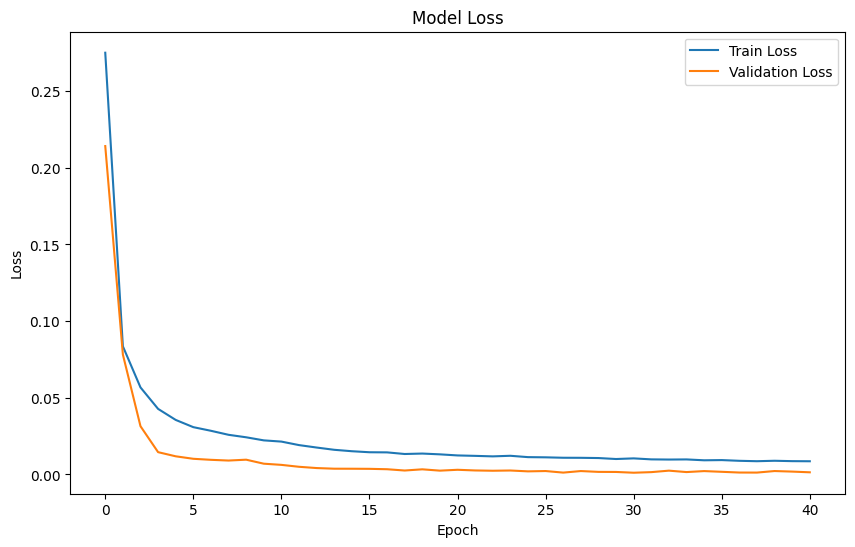

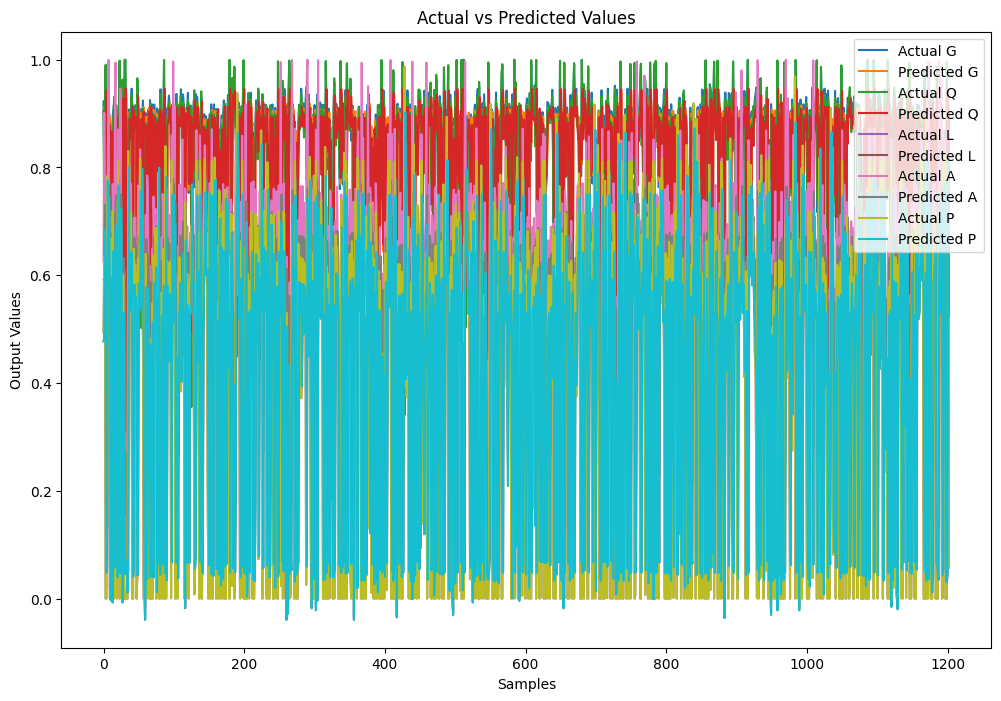

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('craven_data_csv.csv')
input_cols = ['Time', 'pH', 'T', 'DO', 'F'] + ['G', 'Q', 'L', 'A', 'P']
output_cols = ['G', 'Q', 'L', 'A', 'P']

scaler = MinMaxScaler()
data[input_cols] = scaler.fit_transform(data[input_cols])

X = data[input_cols].values
y = data[output_cols].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

model = Sequential()
model.add(GRU(128, activation='relu', return_sequences=True, input_shape=(1, len(input_cols))))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(GRU(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5))


model.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

test_predictions = []
test_input = X_test[0].reshape(1, 1, -1)

for i in range(len(X_test)):
    if i > 0:
        test_input[:, :, len(input_cols)-len(output_cols):] = y_test[i-1]

    pred = model.predict(test_input)
    test_predictions.append(pred)

test_predictions = np.array(test_predictions).squeeze()

predictions_df = pd.DataFrame(test_predictions, columns=output_cols)
predictions_df.to_csv('predictions_gru.csv', index=False)

mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(12, 8))
for i, col in enumerate(output_cols):
    plt.plot(y_test[:, i], label=f'Actual {col}')
    plt.plot(test_predictions[:, i], label=f'Predicted {col}')
plt.title('Actual vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Output Values')
plt.legend(loc='upper right')
plt.show()


## Testing Improvement - better graphs

Epoch 1/200
136/136 [==============================] - 13s 25ms/step - loss: 0.3080 - val_loss: 0.1979 - lr: 0.0010
Epoch 2/200
136/136 [==============================] - 3s 21ms/step - loss: 0.0899 - val_loss: 0.0695 - lr: 0.0010
Epoch 3/200
136/136 [==============================] - 2s 15ms/step - loss: 0.0596 - val_loss: 0.0349 - lr: 0.0010
Epoch 4/200
136/136 [==============================] - 1s 7ms/step - loss: 0.0426 - val_loss: 0.0226 - lr: 0.0010
Epoch 5/200
136/136 [==============================] - 1s 7ms/step - loss: 0.0347 - val_loss: 0.0095 - lr: 0.0010
Epoch 6/200
136/136 [==============================] - 1s 7ms/step - loss: 0.0299 - val_loss: 0.0094 - lr: 0.0010
Epoch 7/200
136/136 [==============================] - 1s 7ms/step - loss: 0.0253 - val_loss: 0.0081 - lr: 0.0010
Epoch 8/200
136/136 [==============================] - 1s 7ms/step - loss: 0.0235 - val_loss: 0.0091 - lr: 0.0010
Epoch 9/200
136/136 [==============================] - 1s 7ms/step - loss: 0.0217 - 

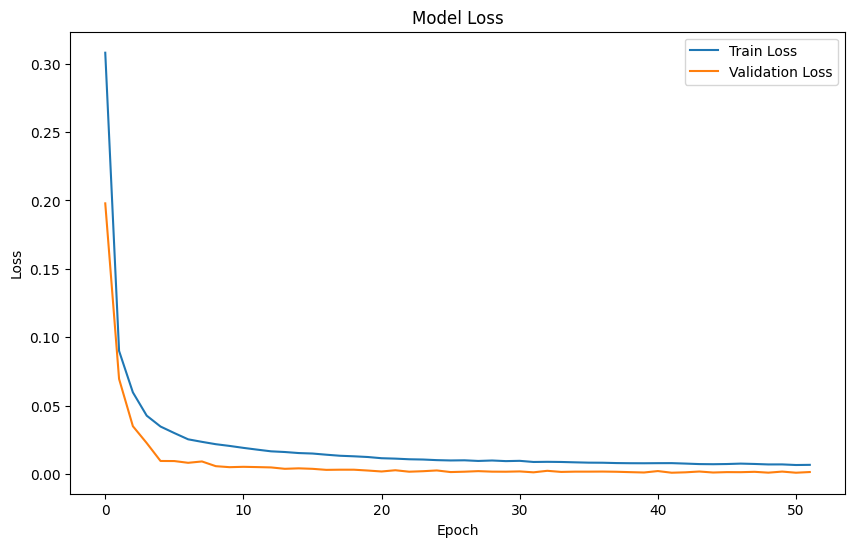

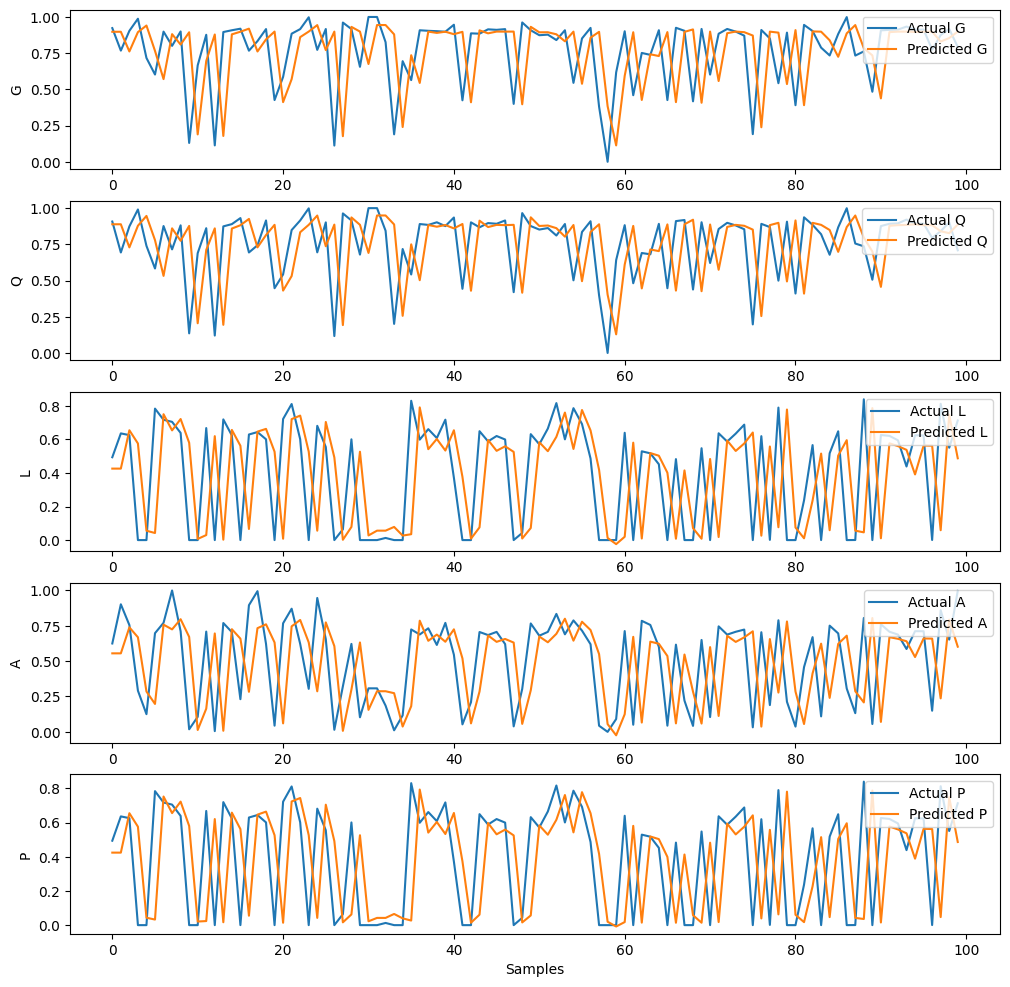

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 1. Data Preprocessing
data = pd.read_csv('craven_data_csv.csv')
input_cols = ['Time', 'pH', 'T', 'DO', 'F'] + ['G', 'Q', 'L', 'A', 'P']
output_cols = ['G', 'Q', 'L', 'A', 'P']

scaler = MinMaxScaler()
data[input_cols] = scaler.fit_transform(data[input_cols])

X = data[input_cols].values
y = data[output_cols].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data to have a time step dimension
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# 2. Model Architecture
model = Sequential()
model.add(GRU(128, activation='relu', return_sequences=True, input_shape=(1, len(input_cols))))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(GRU(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# 4. Model Testing
test_predictions = []
test_input = X_test[0].reshape(1, 1, -1)

for i in range(len(X_test)):
    if i > 0:
        test_input[:, :, len(input_cols)-len(output_cols):] = y_test[i-1]

    pred = model.predict(test_input)
    test_predictions.append(pred)

test_predictions = np.array(test_predictions).squeeze()

# 5. Save Predictions and Comparison with Actual Values
comparison_df = pd.DataFrame(data={'Actual_' + col: y_test[:, i] for i, col in enumerate(output_cols)})
for i, col in enumerate(output_cols):
    comparison_df['Predicted_' + col] = test_predictions[:, i]

comparison_df.to_csv('comparison_gru.csv', index=False)

# 6. Model Evaluation
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Improved visualization for actual vs predicted values with a smaller x-axis range
plt.figure(figsize=(12, 12))
sample_range = 100  # Change this value to zoom in/out
for i, col in enumerate(output_cols):
    plt.subplot(len(output_cols), 1, i+1)
    plt.plot(y_test[:sample_range, i], label=f'Actual {col}')
    plt.plot(test_predictions[:sample_range, i], label=f'Predicted {col}')
    plt.ylabel(col)
    plt.legend(loc='upper right')
plt.xlabel('Samples')
plt.show()


## Improvement - better r2 <- Correct Model

Epoch 1/300
136/136 [==============================] - 9s 19ms/step - loss: 0.4511 - val_loss: 0.2121 - lr: 0.0010
Epoch 2/300
136/136 [==============================] - 2s 15ms/step - loss: 0.1474 - val_loss: 0.0827 - lr: 0.0010
Epoch 3/300
136/136 [==============================] - 2s 15ms/step - loss: 0.0907 - val_loss: 0.0473 - lr: 0.0010
Epoch 4/300
136/136 [==============================] - 2s 18ms/step - loss: 0.0646 - val_loss: 0.0280 - lr: 0.0010
Epoch 5/300
136/136 [==============================] - 3s 25ms/step - loss: 0.0511 - val_loss: 0.0235 - lr: 0.0010
Epoch 6/300
136/136 [==============================] - 2s 15ms/step - loss: 0.0430 - val_loss: 0.0185 - lr: 0.0010
Epoch 7/300
136/136 [==============================] - 2s 15ms/step - loss: 0.0375 - val_loss: 0.0181 - lr: 0.0010
Epoch 8/300
136/136 [==============================] - 2s 15ms/step - loss: 0.0332 - val_loss: 0.0133 - lr: 0.0010
Epoch 9/300
136/136 [==============================] - 2s 15ms/step - loss: 0.02

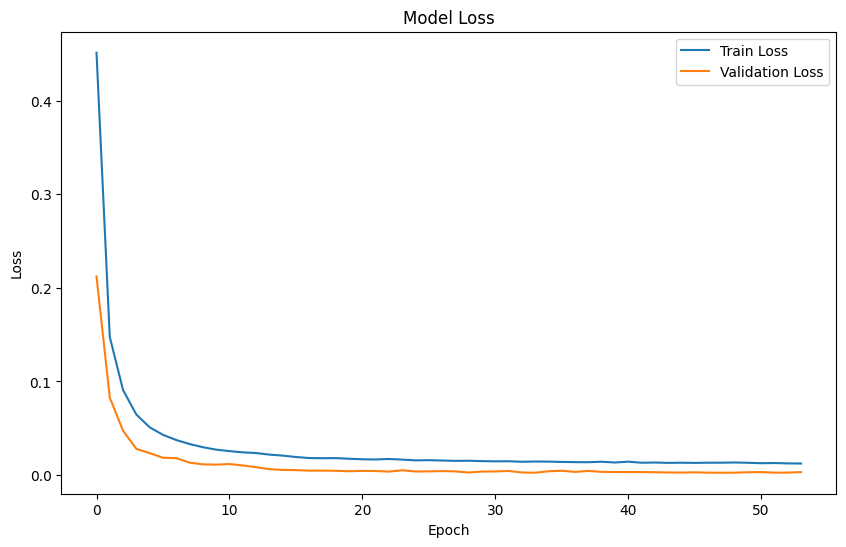

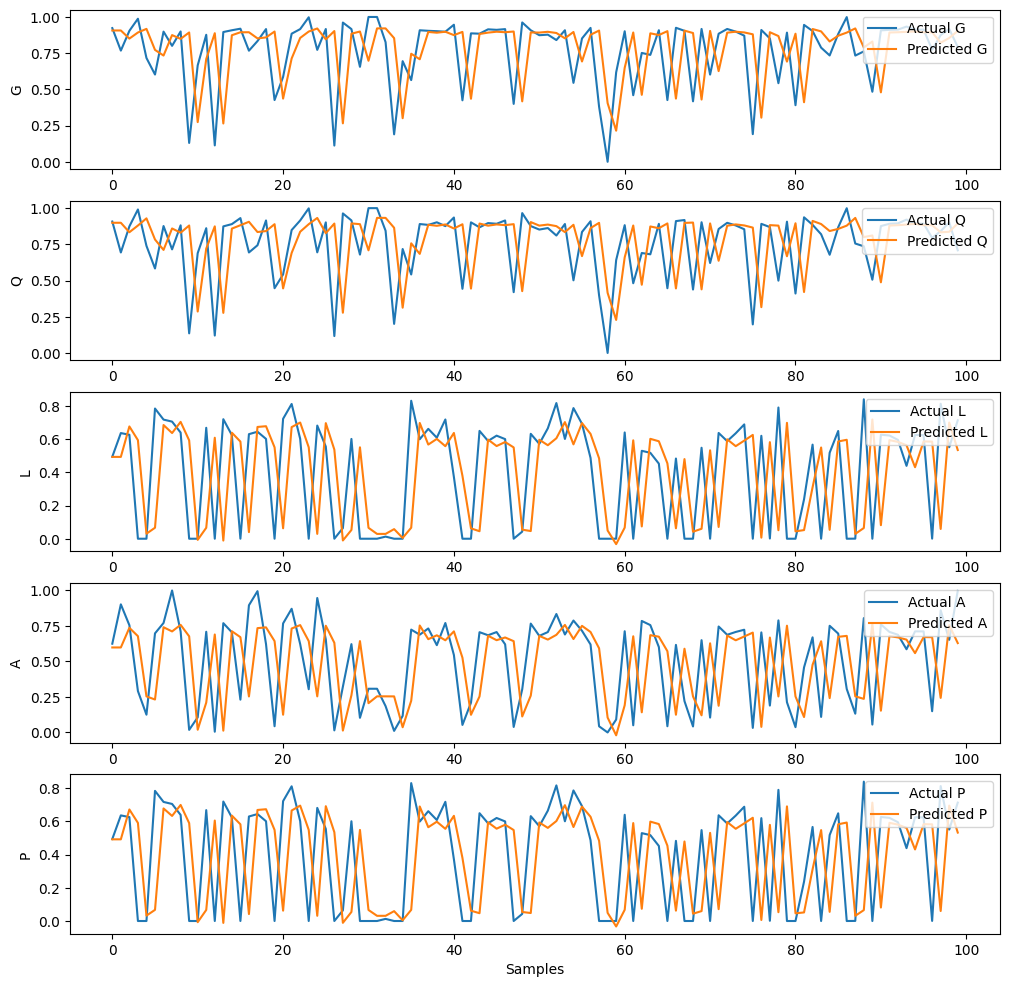

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 1. Data Preprocessing
data = pd.read_csv('craven_data_csv.csv')
input_cols = ['Time', 'pH', 'T', 'DO', 'F'] + ['G', 'Q', 'L', 'A', 'P']
output_cols = ['G', 'Q', 'L', 'A', 'P']

scaler = MinMaxScaler()
data[input_cols] = scaler.fit_transform(data[input_cols])

X = data[input_cols].values
y = data[output_cols].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data to have a time step dimension
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# 2. Model Architecture
model = Sequential()
model.add(GRU(256, activation='relu', return_sequences=True, input_shape=(1, len(input_cols))))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(GRU(128, activation='relu', return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(GRU(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(5))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)

history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# 4. Model Testing
test_predictions = []
test_input = X_test[0].reshape(1, 1, -1)

for i in range(len(X_test)):
    if i > 0:
        test_input[:, :, len(input_cols)-len(output_cols):] = y_test[i-1]

    pred = model.predict(test_input)
    test_predictions.append(pred)

test_predictions = np.array(test_predictions).squeeze()

# 5. Save Predictions and Comparison with Actual Values
comparison_df = pd.DataFrame(data={'Actual_' + col: y_test[:, i] for i, col in enumerate(output_cols)})
for i, col in enumerate(output_cols):
    comparison_df['Predicted_' + col] = test_predictions[:, i]

comparison_df.to_csv('comparison_gru_improved_1.csv', index=False)

# 6. Model Evaluation
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Improved visualization for actual vs predicted values with a smaller x-axis range
plt.figure(figsize=(12, 12))
sample_range = 100  # Change this value to zoom in/out
for i, col in enumerate(output_cols):
    plt.subplot(len(output_cols), 1, i+1)
    plt.plot(y_test[:sample_range, i], label=f'Actual {col}')
    plt.plot(test_predictions[:sample_range, i], label=f'Predicted {col}')
    plt.ylabel(col)
    plt.legend(loc='upper right')
plt.xlabel('Samples')
plt.show()


## Further improved R2

Epoch 1/300
136/136 [==============================] - 12s 35ms/step - loss: 0.4382 - val_loss: 0.1845 - lr: 0.0010
Epoch 2/300
136/136 [==============================] - 5s 33ms/step - loss: 0.1532 - val_loss: 0.0770 - lr: 0.0010
Epoch 3/300
136/136 [==============================] - 4s 32ms/step - loss: 0.0976 - val_loss: 0.0702 - lr: 0.0010
Epoch 4/300
136/136 [==============================] - 4s 29ms/step - loss: 0.0741 - val_loss: 0.0459 - lr: 0.0010
Epoch 5/300
136/136 [==============================] - 3s 24ms/step - loss: 0.0628 - val_loss: 0.0337 - lr: 0.0010
Epoch 6/300
136/136 [==============================] - 2s 17ms/step - loss: 0.0527 - val_loss: 0.0277 - lr: 0.0010
Epoch 7/300
136/136 [==============================] - 3s 24ms/step - loss: 0.0464 - val_loss: 0.0260 - lr: 0.0010
Epoch 8/300
136/136 [==============================] - 2s 14ms/step - loss: 0.0427 - val_loss: 0.0227 - lr: 0.0010
Epoch 9/300
136/136 [==============================] - 2s 14ms/step - loss: 0.0

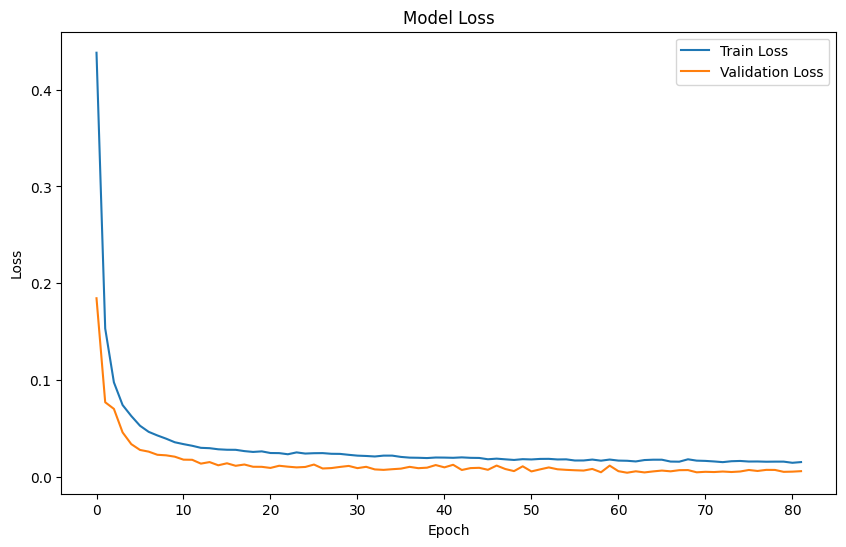

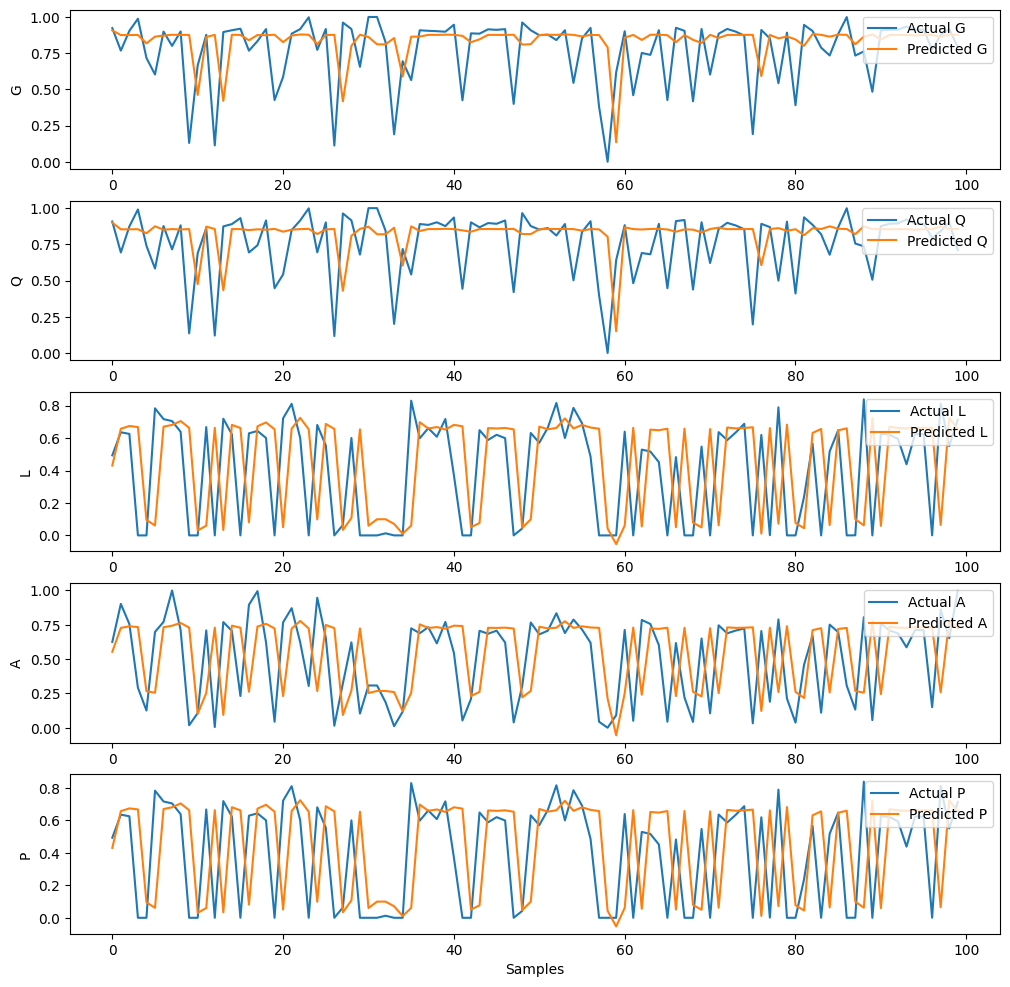

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data_path = 'craven_data_csv.csv'
data = pd.read_csv(data_path)
input_cols = ['Time', 'pH', 'T', 'DO', 'F']
output_cols = ['G', 'Q', 'L', 'A', 'P']

# Normalize the data
scaler = MinMaxScaler()
data[input_cols + output_cols] = scaler.fit_transform(data[input_cols + output_cols])

X = data[input_cols].values
y = data[output_cols].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data to have a time step dimension
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the GRU model
model = Sequential()
model.add(GRU(256, activation='relu', return_sequences=True, input_shape=(1, len(input_cols))))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(GRU(128, activation='relu', return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(GRU(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(len(output_cols)))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)

history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# Model Testing
test_predictions = []
test_input = X_test[0].reshape(1, 1, -1)

for i in range(len(X_test)):
    if i > 0:
        test_input[:, :, len(input_cols)-len(output_cols):] = y_test[i-1]

    pred = model.predict(test_input)
    test_predictions.append(pred)

test_predictions = np.array(test_predictions).squeeze()

# Save Predictions and Comparison with Actual Values
comparison_df = pd.DataFrame(data={'Actual_' + col: y_test[:, i] for i, col in enumerate(output_cols)})
for i, col in enumerate(output_cols):
    comparison_df['Predicted_' + col] = test_predictions[:, i]

comparison_df.to_csv('comparison_gru_improved.csv', index=False)

# Model Evaluation
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Improved visualization for actual vs predicted values with a smaller x-axis range
plt.figure(figsize=(12, 12))
sample_range = 100  # Change this value to zoom in/out
for i, col in enumerate(output_cols):
    plt.subplot(len(output_cols), 1, i+1)
    plt.plot(y_test[:sample_range, i], label=f'Actual {col}')
    plt.plot(test_predictions[:sample_range, i], label=f'Predicted {col}')
    plt.ylabel(col)
    plt.legend(loc='upper right')
plt.xlabel('Samples')
plt.show()


## Hyertuning parameters

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from scikeras.wrappers import KerasRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data_path = 'craven_data_csv.csv'
data = pd.read_csv(data_path)
input_cols = ['Time', 'pH', 'T', 'DO', 'F']
output_cols = ['G', 'Q', 'L', 'A', 'P']

# Normalize the data
scaler = MinMaxScaler()
data[input_cols + output_cols] = scaler.fit_transform(data[input_cols + output_cols])

X = data[input_cols].values
y = data[output_cols].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data to have a time step dimension
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define a function to create the GRU model for hyperparameter tuning
def create_model(optimizer='adam', dropout_rate=0.4, units1=256, units2=128, units3=64):
    model = Sequential()
    model.add(GRU(units1, activation='relu', return_sequences=True, input_shape=(1, len(input_cols))))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(GRU(units2, activation='relu', return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(GRU(units3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(len(output_cols)))
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Wrap the Keras model for use in scikit-learn
model = KerasRegressor(
    model=create_model,
    optimizer='adam',
    dropout_rate=0.4,
    units1=256,
    units2=128,
    units3=64,
    verbose=0
)

# Define the grid search parameters
param_grid = {
    'batch_size': [16, 32],
    'epochs': [50, 100],
    'optimizer': ['adam', 'rmsprop'],
    'dropout_rate': [0.2, 0.4],
    'units1': [128, 256],
    'units2': [64, 128],
    'units3': [32, 64]
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Use the best parameters to create the model
best_params = grid_result.best_params_
best_model = create_model(
    optimizer=best_params['optimizer'],
    dropout_rate=best_params['dropout_rate'],
    units1=best_params['units1'],
    units2=best_params['units2'],
    units3=best_params['units3']
)

# Train the best model with early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)

history = best_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'],
                         validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# Model Testing
test_predictions = []
test_input = X_test[0].reshape(1, 1, -1)

for i in range(len(X_test)):
    if i > 0:
        test_input[:, :, len(input_cols)-len(output_cols):] = y_test[i-1]

    pred = best_model.predict(test_input)
    test_predictions.append(pred)

test_predictions = np.array(test_predictions).squeeze()

# Save Predictions and Comparison with Actual Values
comparison_df = pd.DataFrame(data={'Actual_' + col: y_test[:, i] for i, col in enumerate(output_cols)})
for i, col in enumerate(output_cols):
    comparison_df['Predicted_' + col] = test_predictions[:, i]

comparison_df.to_csv('comparison_gru_improved_2.csv', index=False)

# Model Evaluation
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Improved visualization for actual vs predicted values with a smaller x-axis range
plt.figure(figsize=(12, 12))
sample_range = 100  # Change this value to zoom in/out
for i, col in enumerate(output_cols):
    plt.subplot(len(output_cols), 1, i+1)
    plt.plot(y_test[:sample_range, i], label=f'Actual {col}')
    plt.plot(test_predictions[:sample_range, i], label=f'Predicted {col}')
    plt.ylabel(col)
    plt.legend(loc='upper right')
plt.xlabel('Samples')
plt.show()


#LSTM MODEL

Epoch 1/200
136/136 [==============================] - 5s 11ms/step - loss: 0.1332 - val_loss: 0.0340 - lr: 0.0010
Epoch 2/200
136/136 [==============================] - 2s 11ms/step - loss: 0.0447 - val_loss: 0.0063 - lr: 0.0010
Epoch 3/200
136/136 [==============================] - 2s 12ms/step - loss: 0.0277 - val_loss: 0.0038 - lr: 0.0010
Epoch 4/200
136/136 [==============================] - 1s 11ms/step - loss: 0.0219 - val_loss: 0.0031 - lr: 0.0010
Epoch 5/200
136/136 [==============================] - 1s 11ms/step - loss: 0.0182 - val_loss: 0.0030 - lr: 0.0010
Epoch 6/200
136/136 [==============================] - 1s 10ms/step - loss: 0.0162 - val_loss: 0.0027 - lr: 0.0010
Epoch 7/200
136/136 [==============================] - 1s 11ms/step - loss: 0.0142 - val_loss: 0.0020 - lr: 0.0010
Epoch 8/200
136/136 [==============================] - 1s 7ms/step - loss: 0.0127 - val_loss: 0.0027 - lr: 0.0010
Epoch 9/200
136/136 [==============================] - 1s 8ms/step - loss: 0.0120

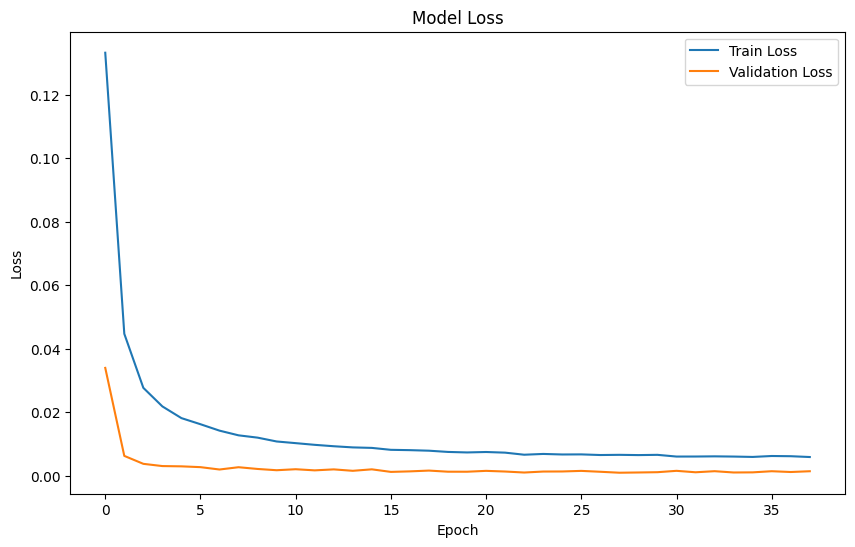

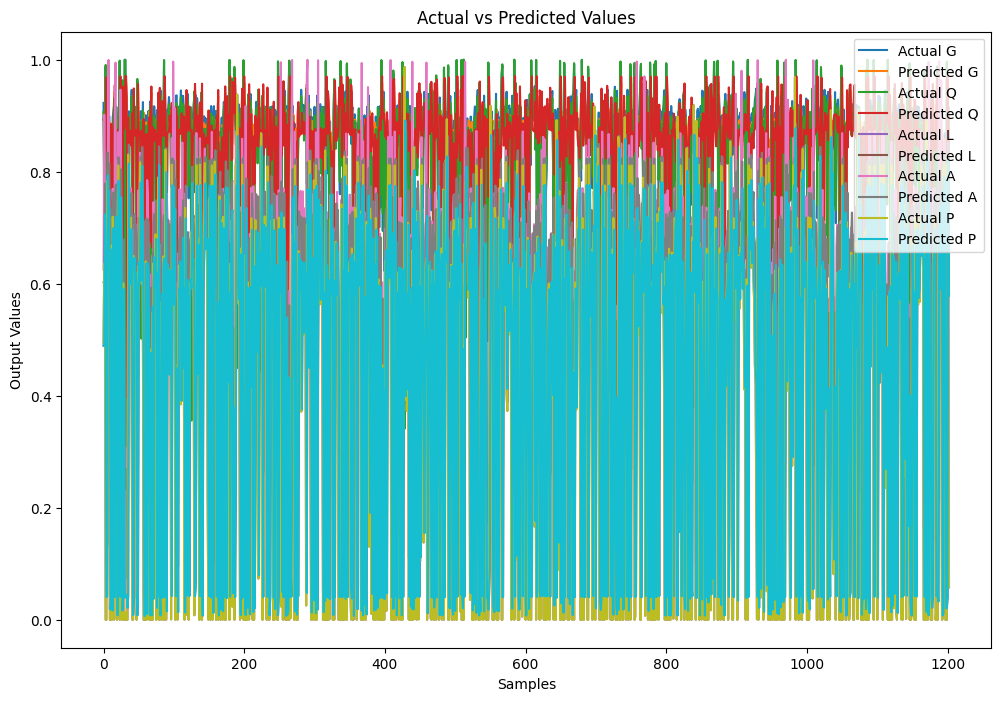

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/craven_data_csv.csv')
input_cols = ['Time', 'pH', 'T', 'DO', 'F']
output_cols = ['G', 'Q', 'L', 'A', 'P']

# Normalize the data
scaler = MinMaxScaler()
data[input_cols + output_cols] = scaler.fit_transform(data[input_cols + output_cols])

X = data[input_cols + output_cols].values
y = data[output_cols].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data to have a time step dimension
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(1, len(input_cols) + len(output_cols))))
model.add(Dropout(0.3))
model.add(LSTM(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# Predict using the model
test_predictions = []
test_input = X_test[0].reshape(1, 1, -1)

for i in range(len(X_test)):
    if i > 0:
        # Use the actual output from the previous time step as input
        test_input[:, :, len(input_cols):] = y_test[i-1].reshape(1, 1, -1)

    pred = model.predict(test_input)
    test_predictions.append(pred)

test_predictions = np.array(test_predictions).squeeze()

# Save predictions and actual values to a CSV file
predictions_df = pd.DataFrame(test_predictions, columns=output_cols)
predictions_df.to_csv('predictions_lstm.csv', index=False)

# Evaluate the model
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot actual vs predicted values for all outputs in one graph
plt.figure(figsize=(12, 8))
for i, col in enumerate(output_cols):
    plt.plot(y_test[:, i], label=f'Actual {col}')
    plt.plot(test_predictions[:, i], label=f'Predicted {col}')
plt.title('Actual vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Output Values')
plt.legend(loc='upper right')
plt.show()
